In [1]:
#  Works for Siemens TWIX, Prisma 
import sys
sys.path.append('/home/sapje1/code/suspect')
import suspect
import numpy as np
from matplotlib import pyplot as plt
import os

In [2]:
# wand 3t megapress
#data_dir = '/home/sapje1/data_sapje1/projects/wand/mrs/19_06_14-11_17_09-DST-1_3_12_2_1107_5_2_43_66073/scans/502-RAW_anonymised/resources/TWIX/files'
#twix_file = 'meas_MID00465_FID13471_mpress_AC_met.dat'

#wand slaser 7T 
data_dir = '/home/sapje1/data_sapje1/projects/wand/mrs_7t'
#twix_file = 'meas_MID68_slaser_AC_met_FID113307.dat'
twix_file = 'meas_MID101_slaser_SMleft_met_FID79132.dat'

#covid bbb brainstem 7t oxford
data_dir = '/home/sapje1/data_sapje1/projects/covidbbb/oxford017'
twix_file = 'meas_MID156_sLaser_Brainstem_20_12_12_FID7821.dat'
#covid bbb brainstem 7t cubric pilot
data_dir = '/home/sapje1/data_sapje1/projects/covidbbb/pilot220315'
twix_file = 'meas_MID165_sLaser_Brainstem_20_12_12_FID118913.dat'

full_path = os.path.join(data_dir, twix_file)
print(full_path)

/home/sapje1/data_sapje1/projects/covidbbb/pilot220315/meas_MID165_sLaser_Brainstem_20_12_12_FID118913.dat


In [3]:
twix_data = suspect.io.twix.load_twix(full_path)
# shape of twix data is (edit_on/edit_off, average, Rx_channel, n_points)
print(twix_data)
print(twix_data.shape)
print(type(twix_data))

/home/sapje1/code/suspect/suspect/io/twix.py:115: FutureWarning: Possible nested set at position 48
  match = re.findall(rgx, header_string)
/home/sapje1/code/suspect/suspect/io/twix.py:115: FutureWarning: Possible nested set at position 34
  match = re.findall(rgx, header_string)
/home/sapje1/code/suspect/suspect/io/twix.py:115: FutureWarning: Possible nested set at position 39
  match = re.findall(rgx, header_string)
/home/sapje1/code/suspect/suspect/io/twix.py:115: FutureWarning: Possible nested set at position 37
  match = re.findall(rgx, header_string)
/home/sapje1/code/suspect/suspect/io/twix.py:115: FutureWarning: Possible nested set at position 38
  match = re.findall(rgx, header_string)
/home/sapje1/code/suspect/suspect/io/twix.py:115: FutureWarning: Possible nested set at position 43
  match = re.findall(rgx, header_string)
/home/sapje1/code/suspect/suspect/io/twix.py:115: FutureWarning: Possible nested set at position 41
  match = re.findall(rgx, header_string)


<MRSBase instance f0=297.17436299999997MHz TE=7.0ms dt=0.0833ms>
(120, 32, 4096)
<class 'suspect.mrsobjects.MRSData'>


In [4]:
# for edited data, deal with edit on/ edit off separately
# channel0 is edit off, channel1 is edit on
comb_channels0 = suspect.processing.channel_combination.combine_channels(twix_data)
avg_comb_channels0 = np.mean(comb_channels0,0)
f_ppm = avg_comb_channels0.frequency_axis_ppm()

(-3.0, 25.0)

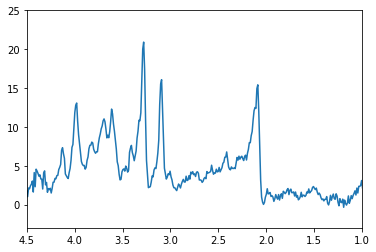

In [5]:
# plot the results of combining and averaging 
fig,ax = plt.subplots()
ax.plot(f_ppm, np.real(1e5*avg_comb_channels0.spectrum()))
ax.set_xlim(4.5,1)
ax.set_ylim(-3,25)

In [40]:
# manual phase
phase0_deg = -40.0
phase1_deg = 0.15 
phase0 = phase0_deg * 3.1415729 /180
phase1 = phase1_deg * 3.1415729 /180
print(phase0,phase1)

-0.698127311111111 0.0026179774166666665


In [42]:
phase_est = suspect.processing.phase.mag_real(avg_comb_channels0,(),(0.0, 6.0))
print(phase_est)
(phase0, phase1) = phase_est
print(phase0)
print(phase1)

[-0.83317996  0.00191874]
-0.8331799563188631
0.001918743264157894


(-3.0, 25.0)

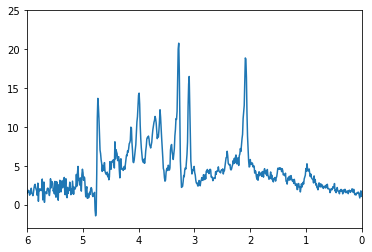

In [43]:
avg_comb_channels_phase = avg_comb_channels0.adjust_phase(phase0,phase1,0)
# plot the results of combining and averaging and phasing
fig,ax = plt.subplots()
ax.plot(f_ppm, np.real(1e5*avg_comb_channels_phase.spectrum()))
ax.set_xlim(6.0,0)
ax.set_ylim(-3,25)

/home/sapje1/miniconda2/envs/suspect/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


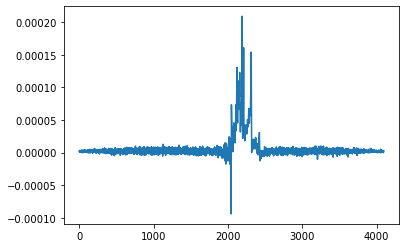

In [8]:
b = np.arange(0,4096)

out = plt.plot(b, avg_comb_channels0.spectrum() )

In [9]:
f_ppm = avg_comb_channels0.frequency_axis_ppm()
print(f_ppm.shape)

(4096,)


In [44]:
print(twix_data.ndim)

3
